In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#constants
alpha, eps, gamma, t = smp.symbols('α ε γ t')

#variables
q1, q2, p1, p2 = smp.symbols('q_1 q_2 p_1 p_2', cls=smp.Function)

#denominator
denom = 2*(alpha - eps**2 * smp.cos(q1(t) - q2(t))**2)

#Hamiltonian function
H = (p1(t)**2 + alpha* p2(t)**2 - 2*eps*p1(t)*p2(t)*smp.cos(q1(t)-q2(t)))/denom - gamma*smp.cos(q1(t)) - smp.cos(q2(t))

The scaled hamiltonian should look like this:
$$\begin{equation}
h = \frac{p_1^2 + \alpha p_2^2 - 2 \epsilon p_1 p_2 \cos(q_1 - q_2)}{2(\alpha - \epsilon^2 \cos^2(q_1 - q_2))} - \gamma \cos(q_1) - \cos(q_2)
\end{equation}$$

In [7]:
H

-γ*cos(q_1(t)) - cos(q_2(t)) + (α*p_2(t)**2 - 2*ε*p_1(t)*p_2(t)*cos(q_1(t) - q_2(t)) + p_1(t)**2)/(2*α - 2*ε**2*cos(q_1(t) - q_2(t))**2)

In [9]:
#scaled hamiltonian function considering that epsilon << 1 and alpha >> epsilon.
h = (p1(t)**2 + alpha* p2(t)**2 - 2*eps*p1(t)*p2(t)*smp.cos(q1(t)-q2(t)))/(2*alpha) - gamma*smp.cos(q1(t)) - smp.cos(q2(t))

We have the following definitions:
$$\begin{equation}\alpha = \frac{m L^2+I_1}{I_2}\end{equation}$$
$$\begin{equation}\epsilon = \frac{mlL}{I_2} \end{equation}$$
$$\begin{equation}\gamma = \frac{V_1}{V_2} \end{equation}$$

Assume that most of the constants will be equal to 1, except the mass of the lower half of the pendulum we have:
$$\begin{equation}\frac{\epsilon}{\alpha} = \frac{m}{m+1} \end{equation}$$

Regarding the energy levels of this hamiltonian, that is, the one that isnt an approximation. The minimal energy levels when only $m$ is different from 1, in fact it must be less than 1, then the energy levels when the hamiltonian has just potential energy are in an interval of $[-3, 3]$ just like the original hamiltonian. Higher energy levels might indicate that all energy is kinetic, but this numerical limit will require more analysis to be determined. The action energy where the pendulum displays chaotic behavior will be determined by the Melnikov Integral.

In [11]:
f1 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-H.diff(q1(t)),"numpy") #p_dot
f2 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-H.diff(q2(t)),"numpy")
f3 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),H.diff(p1(t)),"numpy") #q_dot
f4 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),H.diff(p2(t)),"numpy")

In [13]:
g1 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-h.diff(q1(t)),"numpy") #p_dot
g2 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-h.diff(q2(t)),"numpy")
g3 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),h.diff(p1(t)),"numpy") #q_dot
g4 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),h.diff(p2(t)),"numpy")

In [69]:
#constants should be defined beforehand. 
#I will use just abc for the sake of speed.
#m is the mass of the lower pendulum.
m = 1/25
a = m+1 # alpha
b = a*(m/(m+1)) #epsilon
c = m+1 #gamma

def EqMotion(t, x):
    q1, q2, p1, p2 = x
    dp1 = f1(a,b,c,q1,q2,p1,p2)
    dp2 = f2(a,b,c,q1,q2,p1,p2)
    dq1 = f3(a,b,c,q1,q2,p1,p2)
    dq2 = f4(a,b,c,q1,q2,p1,p2)
    
    return [dq1, dq2, dp1, dp2]
    
def EqMotionApprox(t, x):
    q1, q2, p1, p2 = x
    dp1 = g1(a,b,c,q1,q2,p1,p2)
    dp2 = g2(a,b,c,q1,q2,p1,p2)
    dq1 = g3(a,b,c,q1,q2,p1,p2)
    dq2 = g4(a,b,c,q1,q2,p1,p2)
    
    return [dq1, dq2, dp1, dp2]

In [17]:
from scipy.integrate import solve_ivp

In [19]:
def CheckEnergy(x):
    q1, q2, p1, p2 = x
    denom = 2*(a - b**2 * smp.cos(q1 - q2)**2)
    return (p1**2 + a* p2**2 - 2*b*p1*p2*smp.cos(q1-q2))/denom - c*smp.cos(q1) - smp.cos(q2)

def CheckEnergyApprox(x):
    q1, q2, p1, p2 = x
    return (p1**2 + a* p2**2 - 2*b*p1*p2*smp.cos(q1-q2))/(2*a) - c*smp.cos(q1) - smp.cos(q2)

def PercentChange(arr):
    # Get the difference
    diff = np.diff(arr)
    
    # Get the previous values (excluding the last value)
    prev_values = arr[1:]
    
    # Calculate the percent change
    return diff / prev_values

def Logaritimize(x):
    return smp.log(x,10).evalf()

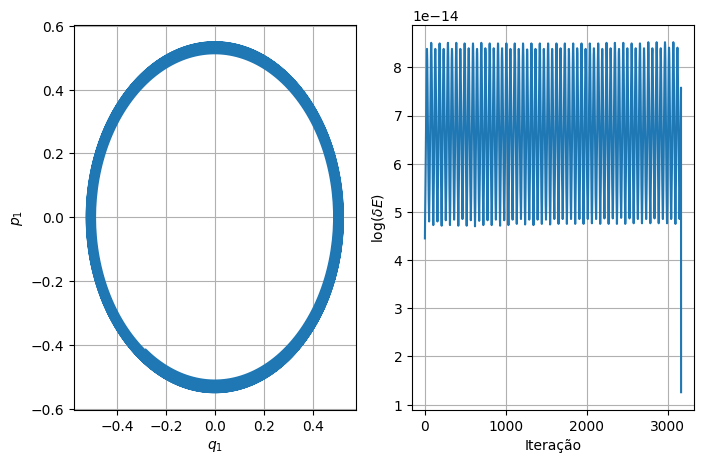

In [71]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 5)
ax[0].grid(True)
ax[0].set_xlabel(r"$q_1$")
ax[0].set_ylabel(r"$p_1$")
ax[1].grid(True)
ax[1].set_xlabel(r"Iteração")
ax[1].set_ylabel(r"$\log(\delta E)$")

y0 = [np.pi/6, np.pi/6, 0.0, 0.0]
temp = []
t_span = (0, 100)
solution = solve_ivp(EqMotion, t_span, y0, rtol = 10e-12, atol = 10e-12)
if solution.status == 0:
    ax[0].plot(solution.y[0], solution.y[2])
    energy = np.apply_along_axis(CheckEnergy, 1, solution.y.T)
    changes = PercentChange(energy).astype(float)
    ax[1].plot(changes[1:])
else:
    print(solution.message)

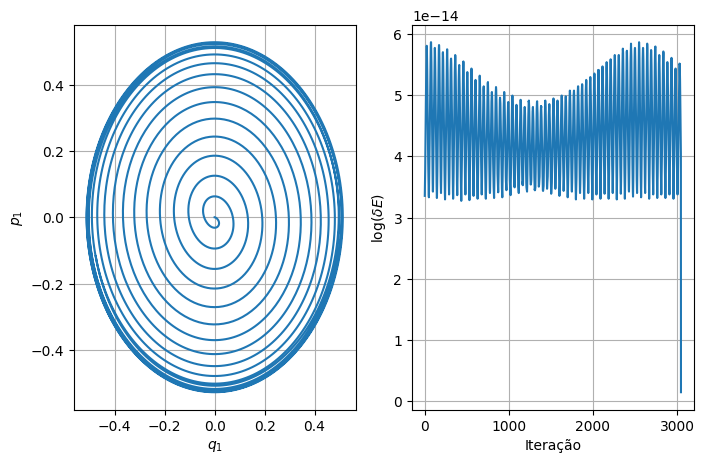

In [72]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 5)
ax[0].grid(True)
ax[0].set_xlabel(r"$q_1$")
ax[0].set_ylabel(r"$p_1$")
ax[1].grid(True)
ax[1].set_xlabel(r"Iteração")
ax[1].set_ylabel(r"$\log(\delta E)$")
y0 = [0, np.pi/6, 0.0, 0.0]
t_span = (0, 100)
solution = solve_ivp(EqMotionApprox, t_span, y0, rtol = 10e-12, atol = 10e-12)
if solution.status == 0:
    ax[0].plot(solution.y[0], solution.y[2])
    energy = np.apply_along_axis(CheckEnergyApprox, 1, solution.y.T)
    changes = PercentChange(energy).astype(float)
    ax[1].plot(changes[1:])
else:
    print(solution.message)

In [77]:
def p_theta(data):#First root of the quadratic equation to get p_theta
    q2, p2, E = data
    return b*p2*np.cos(q2) + a*np.sqrt((b/a)**2 *np.cos(q2)**2 * p2**2 - 2*((p2**2)/2-E-c-np.cos(q2))*(1/a))

In [79]:
def f_helper(q2, E):
    return 2*(E+c+np.cos(q2))*(a- b**2 * np.cos(q2)**2)

def p_theta_alt(q2, p2, E): #Second root.
    return b*p2*np.cos(q2) - np.sqrt((b)**2 *np.cos(q2)**2 * p2**2 + f_helper(q2,E) - a* p2**2)

In [81]:
def section(t, y):
    return y[0]

The following code was something I found at: https://computational-physics.tripos.org/notes/ode

Alternative code for generating poincare sections for a constant energy but different initial conditions. The initial conditions are generated using a Uniform probability distribution.

In [85]:
data = np.array([np.linspace(-np.pi/6, np.pi/6, 10), 
                 np.linspace(-1.0, 1.0, 10),
                0.1*np.ones(10)])
p_thetas = np.apply_along_axis(p_theta, 1, data.T)

#data[0]= q_2
#data[1] = p_2
#data[2] = E

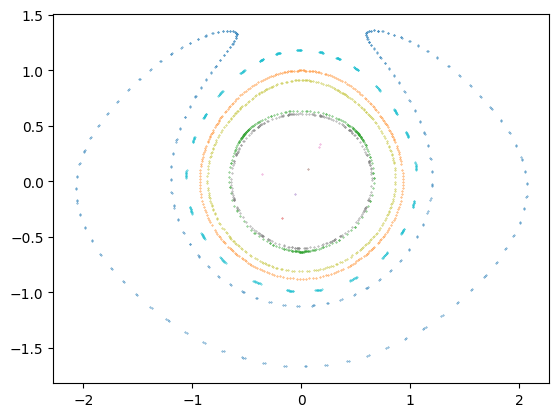

In [87]:
section.terminal = False
section.direction = 1

fig, ax = plt.subplots(1, 1)

for i in range(p_thetas.shape[0]):
    solution = solve_ivp(EqMotionApprox, [0, 2500], [0, data[0][i], p_thetas[i], data[1][i]], events=section, atol=1e-9, rtol=1e-9)
    if solution.success == True:
        if len(solution.y_events[0]) > 0:
            ax.scatter(*solution.y_events[0][:, 1::2].T, s=0.1)

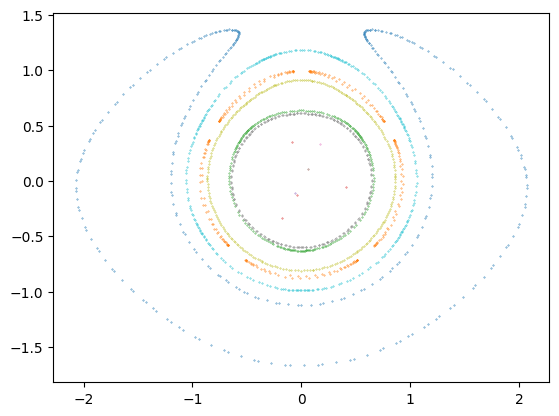

In [88]:
fig, ax = plt.subplots(1, 1)

section.terminal = False
section.direction = 1

for i in range(p_thetas.shape[0]):
    solution = solve_ivp(EqMotion, [0, 2500], [0, data[0][i], p_thetas[i], data[1][i]], events=section, atol=1e-9, rtol=1e-9)
    if solution.success == True:
        if len(solution.y_events[0]) > 0: 
            ax.scatter(*solution.y_events[0][:, 1::2].T, s=0.1)

# Exploring the influence of the separatrix solution on the behavior of the system.

## Part 1: Deriving the separatrix solution.

For the sake of reference: We have the second (simple) pendulum, the one without coefficients:

$$\begin{equation*}
G = \frac{p_2^2}{2} - \cos(q_2)
\end{equation*}$$

Its separatrix solution is ($G = 1$),
$$
\DeclareMathOperator{\sech}{sech}
\begin{equation}
(q_2, p_2) = (\pm 2 \arcsin(\tanh(t)), \pm 2 \sech(t))
\end{equation}
$$

I can also provide the separatrix solution of the first pendulum just in case

$$
\begin{equation*}
(q_1, p_1) = (\pm 2 \arcsin(\tanh(\omega_0 t)), \pm 2 \omega_0 \sech(\omega_0 t))
\end{equation*}
$$

Where $\omega_0 = \sqrt{\alpha \gamma}$. You get this when $F = \gamma$. (F being the hamiltonian of the first pendulum.)

Given the first separatrix solution for the angle, we can arrive at the following results:

$$
\begin{gather*}
\cos(\theta) = \pm (1-2 \tanh^2(t)) \\
\sin(\theta) = \pm (-2\tanh(t)\sech(t))
\end{gather*}
$$

Where the second depends on our choice of the positive part or negative part in the equation (1).

## Part 2: Getting the appropriate initial conditions.

For the sake of simplicity, I chose $q_1 = 0$ in a arbitrary manner. I already know that part of the hamiltonian is equal to 1, that is,
the energy contribution of the second pendulum as I said above. All I need to do is to use those equations to get the appropriate initial
conditions for whatever energy level I want.

We have:
$$
h = -γ \cos(q_{1})+ \frac{p_2^2}{2} - \cos(q_{2}) - \frac{ε p_1 p_2 \cos(q_{1} - q_2)}{α} + \frac{p_1^2}{2 α}
$$

Applying the idea above:

$$
h = - \gamma + \frac{p_1^2}{2 \alpha} + G + \frac{\epsilon}{\alpha} p_{2}^{0} \cos(q_2^{0}) p_1
$$

Where $G=1$ and I used the superscript of $0$ to denote the initial condition extracted from the separatrix solution.

$$
\begin{gather*}
p_1 &= \frac{-b \pm \sqrt{b^2 - 4ac}}{2 a} \\
b &= \frac{-\epsilon}{\alpha} p_2^0 \cos(q_2^0) \\
a &= \frac{1}{2 \alpha} \\
c &= G - \gamma - h
\end{gather*}
$$

# Getting the initial conditions and integrating the equations

I choose the following initial conditions for the separatrix solution:
$$
C_0 = \{(0, 2), (0, -2), (\pi, 0), (-\pi, 0)\}
$$

Under these conditions the solution of $p_1$ depends entirely on the energy. In order to get a positive delta we need: $h > (G-\gamma)$

In [91]:
print(1-c) #Reminder that I chose c as the python variable to denote the numerical value of gamma.

p = lambda q2,p2, h: smp.solve((p1(t)**2)/(2*a) - (b/a)*p2*smp.cos(q2)*p1(t) + 1-c-h, p1(t))

-0.040000000000000036


In [93]:
conds = np.array([[0,0, p(0, 2, 0.0)[0], 2],
                  [0,0, p(0, -2, -0.035)[0],  -2],
                  [0,np.pi, p(np.pi, 0, -0.025)[0],  0],
                  [0,-np.pi, p(-np.pi, 0, -0.018)[0], 0]])

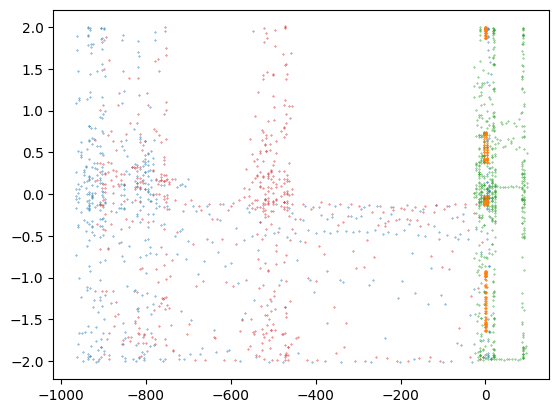

In [95]:
fig, ax = plt.subplots(1, 1)

section.terminal = False
section.direction = 1

for cond in conds:
    solution = solve_ivp(EqMotionApprox, [0, 3500], cond, events=section, atol=1e-9, rtol=1e-9)
    if solution.success == True:
        if len(solution.y_events[0]) > 0: 
            ax.scatter(*solution.y_events[0][:, 1::2].T, s=0.1)

# Averaging and pertubations.

A Taylor Expansion on the approximated hamiltonian vs the actual hamiltonian results in the following:

$$\begin{equation}
\frac{\epsilon \cos(x)}{\alpha - \epsilon^2 \cos^2(x)} \approx \frac{\epsilon}{\alpha - \epsilon^2} - \frac{x^2 (\epsilon(\alpha + \epsilon^2))}{2(\alpha - \epsilon^2)^2} + O(x^4)
\end{equation}$$

$$\begin{equation}
\frac{\epsilon}{\alpha} \cos(x) \approx \frac{\epsilon}{\alpha} - \frac{\epsilon}{\alpha} \frac{x^2}{2} + O(x^4)
\end{equation}$$

What I'm trying to say with this is that: Given $\epsilon \ll 1$, the approximated hamiltonian has a pertubation that is very close to the pertubation of the actual hamiltonian. 

This leads me to make a 4th order approximation using the harmonic oscillator as an integrable case.

$$\begin{equation}
h_0 = \frac{p_1^2}{2 \alpha} + \frac{\gamma q_1^2}{2} + \frac{p_2^2}{2} + \frac{q_2^2}{2} - \gamma - 1
\end{equation}$$

As for the pertubation, it will be split into 2, with a maximum of 4th order terms:

$$
\begin{gather}
F_1 = \frac{1}{4!}(\gamma q_1^4 + q_2^4) \\
F_2 = \frac{\beta}{\alpha} p_1 p_2 \left(1 - \frac{\Delta^2}{2} \right)
\end{gather}
$$

Where $\Delta  = |q_1 - q_2|$ and $F_1$ is the first order pertubation and $F_2$ is the second order pertubation.

Solutions to the integrable part:

$$
\begin{gather}
\Gamma_1 = \frac{p_1^2}{2\alpha} + \frac{\gamma q_1^2}{2} \\
\Gamma_2 = E_2 + \gamma + 1 = \frac{p_2^2}{2} + \frac{q_2^2}{2}
\end{gather}
$$

$$
\begin{gather}
p_1 = \sqrt{2 \alpha \omega_1 J_1} \cos(\phi_1) && q_1 = \sqrt{\frac{2J_1}{\alpha \omega_1}} \sin(\phi_1) \\
p_2 = \sqrt{2 J_2} \cos(\phi_2) && q_2 = \sqrt{2 J_2} \sin(\phi_2)
\end{gather}
$$

Where $\omega_2 = 1$.

The following are the results of applying canonical pertubation theory, which involves making a canonical transformation: $(\phi, J) \rightarrow (\theta, I)$, such that the hamiltonian $H(J, \phi) = H_0(J) + \epsilon H_1(J,\phi)$ becomes $\bar{H}(I) = \bar{H}_0(I) + \epsilon \bar{H}_1(I)$

$$
\begin{gather*}
\bar{H}_1(I) = \frac{-3\gamma}{16 \pi} \left(\left(\frac{2 I_1}{\alpha \omega_1} \right)^2  + (2 I_2)^2 \right) \\
\bar{H}_2(I) = \frac{-17}{2308} \left(\frac{I_1^3 \gamma^2}{\omega^5 \alpha^4}  + I_2^3\right)
\end{gather*}
$$

Below are the actual calculations that led me to these results.

In [118]:
#Setting up the variables and functions.
#constants
alpha, eps, gamma, t = smp.symbols('α ε γ t')

#variables
q1, q2, p1, p2 = smp.symbols('q_1 q_2 p_1 p_2')

#Canonical pertubation variables
I1, I2, theta1, theta2 = smp.symbols("I_1 I_2 θ_1 θ_2")

per, omega = smp.symbols('β ω') #per as in pertubation. Cant use epsilon as it might conflict with the 
#previous definition.

F1 = (1/smp.factorial(4))*(gamma*(q1**4) + q2**4)

F2 = (per/alpha)*p1*p2*(1-((q1-q2)**2)/2)

In [120]:
F1 = F1.subs([(q1, smp.sqrt((2*I1)/(alpha*omega))*smp.sin(theta1)),
         (q2, smp.sqrt(2*I2)*smp.sin(theta2))])

In [122]:
F2= F2.subs([(q1, smp.sqrt((2*I1)/(alpha*omega))*smp.sin(theta1)),
         (q2, smp.sqrt(2*I2)*smp.sin(theta2)),
         (p1, smp.sqrt(2*alpha*omega*I1)*smp.cos(theta1)),
         (p2, smp.sqrt(2*I2)*smp.cos(theta2))])

In [124]:
F1 = F1.expand()
F2 = F2.expand()

In [126]:
H1_per= smp.integrate(smp.integrate(F1, (theta1, 0, 2*smp.pi)), (theta2, 0, 2*smp.pi))*(1/(4*smp.pi**2))
H1_per = H1_per.expand()

In [128]:
series = smp.fourier_series(F1, (theta2, -smp.pi, smp.pi))

In [130]:
series.truncate(n=4)

-I_1**2*γ*cos(2*θ_1)/(12*α**2*ω**2) + I_1**2*γ*cos(4*θ_1)/(48*α**2*ω**2) + I_1**2*γ/(16*α**2*ω**2) - I_2**2*cos(2*θ_2)/12 + I_2**2*cos(4*θ_2)/48 + I_2**2/16

In [132]:
temp = series.truncate(n=5)

In [134]:
f11 = -((I1**2 * gamma)/(12*alpha**2 * omega**2))/2
f21 =((I1**2 * gamma)/(48*alpha**2 * omega**2))/2

f12 = -((I2**2)/12)/2
f22 = ((I2**2)/48)/2

In [136]:
W_1 = (-1/(omega))*f11*smp.sin(2*theta1) + (-1/(2*omega))*f21*smp.sin(4*theta1)
W_2 = -f12*smp.sin(2*theta2) - f22*smp.sin(4*theta2)/2
W = W_1 + W_2

In [138]:
temp = W.diff(theta1)*omega + W.diff(theta2) + F1

In [140]:
temp.simplify()

I_1**2*γ/(16*α**2*ω**2) + I_2**2/16

In [142]:
H1_per

I_1**2*γ/(16*α**2*ω**2) + I_2**2/16

The calculations match exactly. Now the second order pertubation can be computed.

Given the first W function we can start making the second order pertubation calculations.

The result should be equal to:

$$\begin{equation}
<\omega(I),\nabla_{\phi} W^{(1)}> + F_1(I, \phi) = H_1^{'}(I)
\end{equation}$$

The coefficients of the f's below were found by means of the an and bn methods of the series object
that sympy returns when you ask for a fourier series.

$$
H_2(I) = \langle F_2 \rangle + \langle \nabla_I F_1 \cdot \nabla_{\theta} W^{(1)} \rangle
+ \frac{1}{2} \frac{\partial^2 H_0}{\partial I_k \partial I_l} \left\langle \frac{\partial W^{(1)}}{\partial \theta_l} \frac{\partial W^{(1)}}{\partial \theta_l} \right\rangle
$$


In this particular problem we have that $\langle F_2 \rangle$ = 0.

In [147]:
temp = W.diff(theta1)*F1.diff(I1)+ W.diff(theta2)*F1.diff(I2)
temp = temp.expand()

In [149]:
temp

I_1**3*γ**2*sin(θ_1)**4*cos(2*θ_1)/(36*α**4*ω**5) - I_1**3*γ**2*sin(θ_1)**4*cos(4*θ_1)/(144*α**4*ω**5) + I_2**3*sin(θ_2)**4*cos(2*θ_2)/36 - I_2**3*sin(θ_2)**4*cos(4*θ_2)/144

In [151]:
temp = smp.integrate(smp.integrate(temp, (theta1, 0, smp.pi*2)), (theta2, 0, smp.pi*2))

In [152]:
temp = temp/(4*smp.pi**2)

With this we have calculated the term $\langle \nabla_I F_1 \cdot \nabla_\theta W^{(1)} \rangle$

Because of the context, we can see that clearly:
$$
\frac{\partial^2 H_0}{\partial I_k \partial I_l} = 0
$$

Therefore:
$$
H_2(I) = \langle \nabla_I F_1 \cdot \nabla_\theta W^{(1)} \rangle
$$

In [156]:
H2_avg = smp.simplify(temp)

In [158]:
H2_avg

-17*I_1**3*γ**2/(2304*α**4*ω**5) - 17*I_2**3/2304

In [102]:
H2_avg = smp.factor(H2_avg)

In [104]:
H1_per

I_1**2*γ/(16*α**2*ω**2) + I_2**2/16

In [160]:
H_avg = I1*omega + I2 + eps*H1_per/24 + (eps**2)*H2_avg

In [162]:
H_avg

I_1*ω + I_2 + ε**2*(-17*I_1**3*γ**2/(2304*α**4*ω**5) - 17*I_2**3/2304) + ε*(I_1**2*γ/(16*α**2*ω**2) + I_2**2/16)/24